### 9. Znajdowanie stanu stacjonarnego - "agentowe"

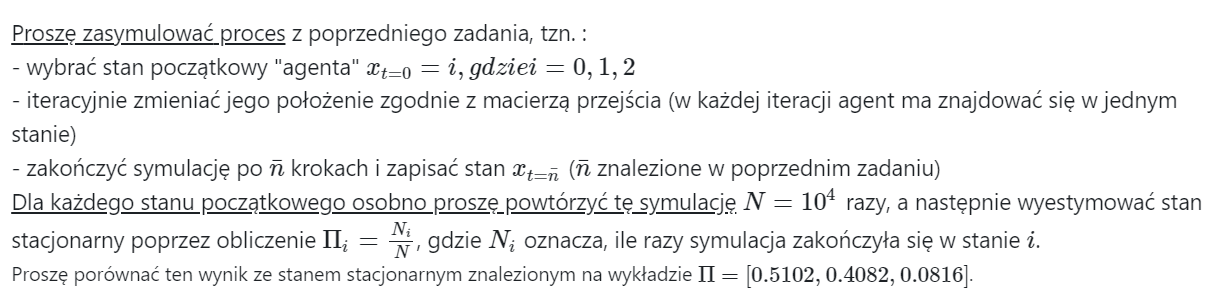

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
P = np.array([
    [0.64, 0.32, 0.04],
    [0.4, 0.5, 0.1],
    [0.25, 0.5, 0.25]
]) # 3x3 matrix

theoretical = np.array([0.5102, 0.4082, 0.0816])

NUM_STATES = 3 # 0, 1, 2
N = 10_000 # 1e4 is a float by default
STEPS = 10 # from ex8.ipynb

ending_states = np.zeros((NUM_STATES, N), dtype=int) # or empty?

for starting_state in range(NUM_STATES):
    print(starting_state)
    for n in range(N):
        state = starting_state
        for step in range(STEPS):
            state = np.random.choice(NUM_STATES, p=P[state]) # transition to a new state
        ending_states[starting_state, n] = state

# stationary_state_estims = [ # index is a starting_state
#     np.unique(np.array(ending_states[starting_state]), return_counts=True)[1]/N # only counts 
#     for starting_state in range(NUM_STATES)
# ]

# the first version wouldn't work if somehow some state didn't appear even once
# that is the ending_states[starting_state] array would only contain, say, states 0 and 1 but not 2
stationary_state_estims = np.array([
    np.bincount(ending_states[starting_state], minlength=NUM_STATES)/N
    for starting_state in range(NUM_STATES)
])

print(stationary_state_estims)

0
1
2
[[0.5171 0.4025 0.0804]
 [0.5114 0.4084 0.0802]
 [0.506  0.4098 0.0842]]


In [7]:
for sse in stationary_state_estims:
    print(np.linalg.norm(np.array(sse)-theoretical))

0.00902995016597545
0.001854723699099134
0.005192301994298845


Po wyliczeniu stanów stacjonarnych, użyłem normy Euklidesowej, żeby porównać każdy ze stanów stacjonarnych z teoretyczną wartością. Odległości są niewielkie, co oznacza, że wyliczone wartości są dość dokładne, bliskie wartości teoretycznej. 

Poniżej dodatkowo przedstawienie porównania rozkładu stacjonarnego dla różnych stanów początkowych oraz porównanie każdego z nich z wartością teoretyczną (na szaro):

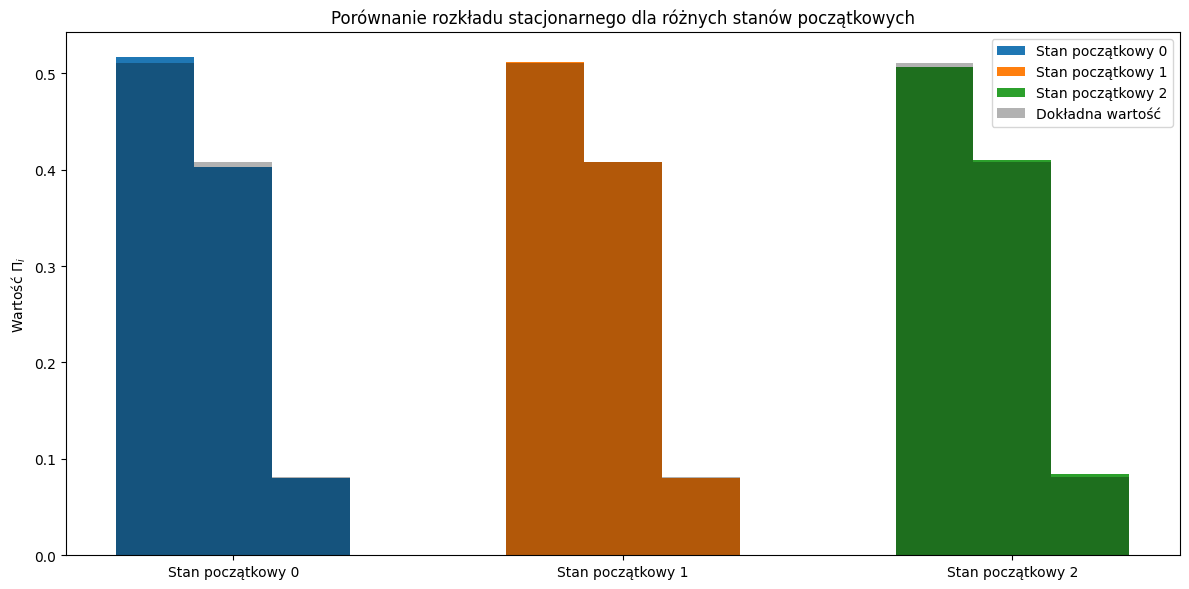

In [5]:
plt.figure(figsize=(12,6))

bar_width = 0.2
group_spacing = 0.4
group_positions = np.arange(len(stationary_state_estims)) * (3*bar_width + group_spacing) # like offsets, starting with 0

# plot each group (starting state)
for i, sse in enumerate(stationary_state_estims):
    # 3 bars for each starting state
    x_positions = group_positions[i] + np.arange(3) * bar_width
    plt.bar(x_positions, sse, width=bar_width, label=f"Stan początkowy {i}")
    
    # exact values as black transparent bars
    if i == len(stationary_state_estims)-1:  # only add to legend once
        plt.bar(x_positions, theoretical, width=bar_width, 
                color='black', alpha=0.3, label='Dokładna wartość')
    else:
        plt.bar(x_positions, theoretical, width=bar_width, 
                color='black', alpha=0.3)

group_centers = group_positions + bar_width
plt.xticks(group_centers, [f'Stan początkowy {i}' for i in range(len(stationary_state_estims))])

plt.title('Porównanie rozkładu stacjonarnego dla różnych stanów początkowych')
plt.ylabel(r'Wartość $\Pi_i$')
plt.legend()
plt.tight_layout()